# (공부) 데이터시각화
> 작성완료

- toc:true
- branch: master
- badges: true
- comments: true
- author: kimha02
- categories: [Python]

## matplotlib: 벡터친화적인 시각화 

### 예제1 

In [3]:
! pip install matplotlib   #패키지 설치

In [4]:
import matplotlib.pyplot as plt

In [98]:
x=[1,2,3,4]
y=[1,2,3,2]

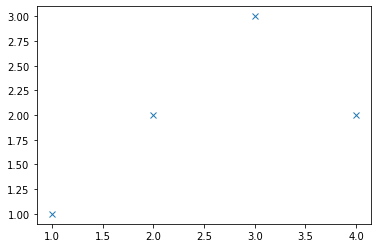

In [6]:
plt.plot(x,y,'x')  ### 'x'는 모양

In [7]:
y2=[1.1,2.1,3.2,1]

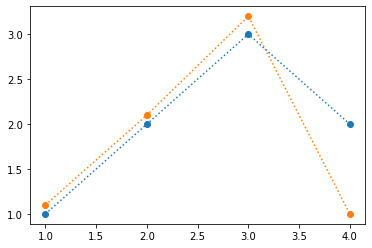

In [8]:
plt.plot(x,y,':o')
plt.plot(x,y2,':o')

#### 예제2

In [9]:
import pandas as pd 

In [39]:
dfdata=pd.read_csv("dfdata[1].csv")

In [50]:
dfdata.head()

,toeic,gpa,employed,company,salary
0,400,4.2,N,-,0
1,445,2.2,N,-,0
2,440,3.4,N,-,0
3,490,3.8,N,-,0
4,520,4.1,Y,K,5000


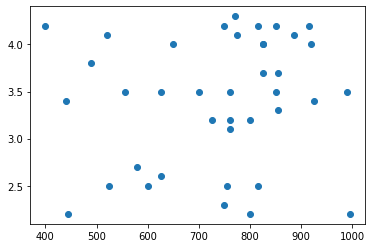

In [42]:
plt.plot(dfdata.toeic,dfdata.gpa,'o') #x=toeic, y=gpa, shape='o'

`-` 색깔로 그룹 구분하기

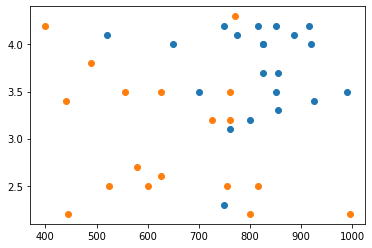

In [51]:
toeic_y=dfdata.query('employed=="Y"').toeic   #채용된 사람들의 토익점수
toeic_n=dfdata.query('employed=="N"').toeic   #채용 안 된 사람들의 토익점수
gpa_y=dfdata.query('employed=="Y"').gpa   #채용된 사람들의 성적
gpa_n=dfdata.query('employed=="N"').gpa   #채용 안 된 사람들의 성적
plt.plot(toeic_y,gpa_y,'o')  #Blue Point
plt.plot(toeic_n,gpa_n,'o')  #Orange Point

`-` 그런데 과정이 좀 복잡해보인다.  
> 과정 : 데이터프레임 -> 쿼리문 -> 필터링된 데이터 프레임 -> 벡터화 -> 저장 -> 플랏  
데이터 프레임을 벡터화하여 플랏하는 과정은 필수적인데 좀 귀찮다.  
**★ 바로 플랏하는 방법을 알아보자!**

-------

## seaborn: 데이터프레임 친화적인 시각화 

### 예제2 (이어서)

In [52]:
import seaborn as sns 

`-` 아까 그린 Blue, Orange 그림을 그려보자.

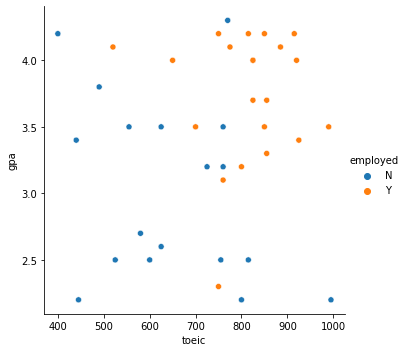

In [54]:
sns.relplot(data=dfdata, x='toeic',y='gpa',hue='employed')  #범례도 생긴다. hue에 그룹핑하고 싶은 변수 입력

`–` 취업된 사람들이 각각 어떠한 회사에 갔는지 궁금하다. 

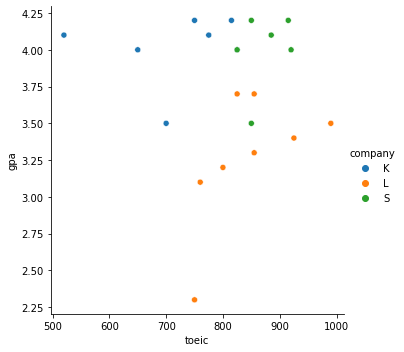

In [55]:
sns.relplot(data=dfdata.query('employed=="Y"'), x='toeic',y='gpa',hue='company')

`-` 연봉정보도 한눈에 알아보기 쉽게 그리고 싶다면?  

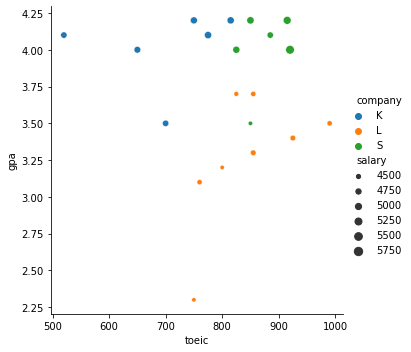

In [56]:
sns.relplot(data=dfdata.query('employed=="Y"'), x='toeic',y='gpa',hue='company',size='salary')

--------------------

## 객체지향적 인터페이스
`-` 위에서 까지 진행한 것은 함수에 값을 입력하면 함수가 알아서 실행되어 플랏을 그리는 방식임 -> 데이터 전처리 계획 등이 필요함  
`-` 객체지향적 인터페이스는 그림을 보며 하나씩 만들어가는 느낌 -> 자유도가 높다!

In [140]:
p1=plt.figure()

<Figure size 432x288 with 0 Axes>

In [141]:
p1

<Figure size 432x288 with 0 Axes>

In [142]:
p1.axes

[]

In [143]:
p1.add_axes([0,0,1,1])  #(0,0)위치에 가로세로 길이가 1인 축을 만들어라

<Axes:>

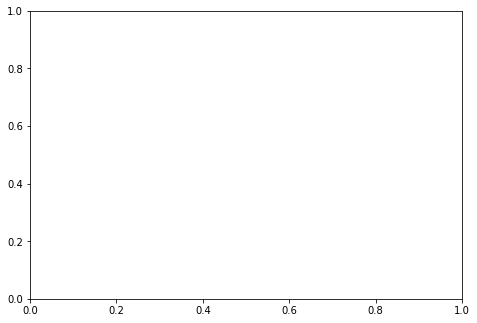

In [144]:
p1   #축 1개 생성

In [145]:
p1.add_axes([0,1,1,1])

<Axes:>

In [146]:
p1.axes

[<Axes:>, <Axes:>]

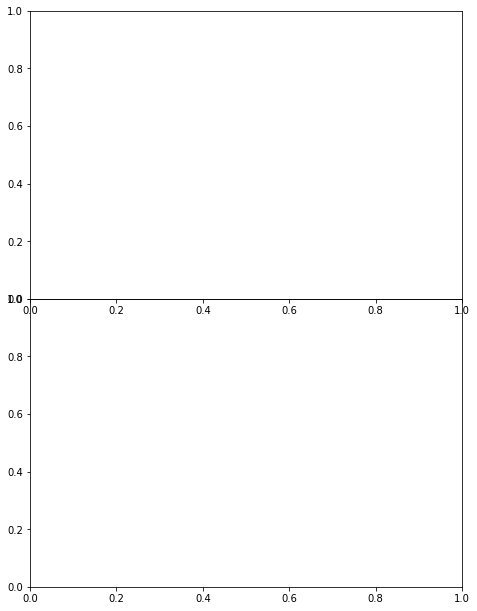

In [147]:
p1

In [148]:
p1.add_axes([0.5,0.5,1,1])  #(0.5,0.5)위치에 가로세로 길이가 1인 축을 만들어라

<Axes:>

In [149]:
p1.axes

[<Axes:>, <Axes:>, <Axes:>]

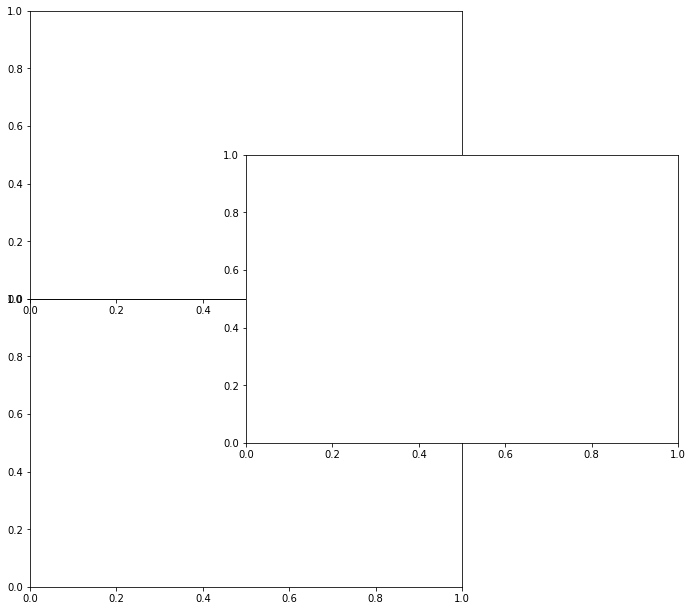

In [150]:
p1

In [152]:
p1.axes[0].plot(x,y)  #가장 처음 만든 면에 plot

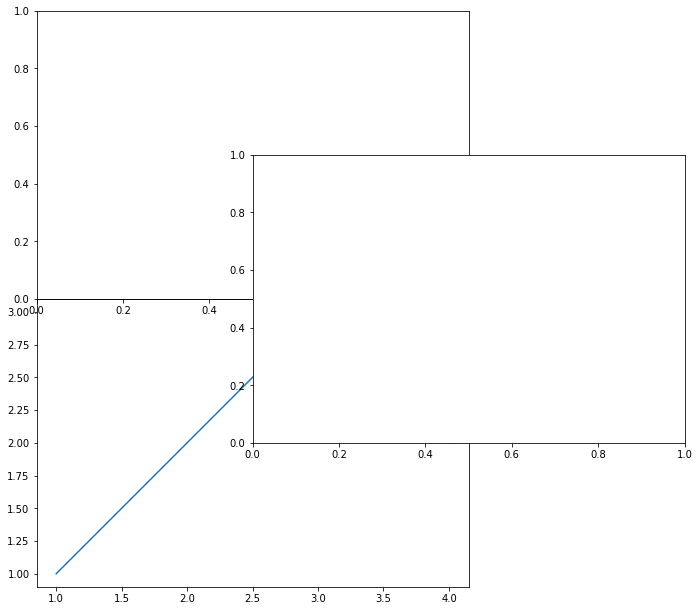

In [135]:
p1

In [154]:
p1.axes[2].plot(x,y,'o') #3번째 면에 plot

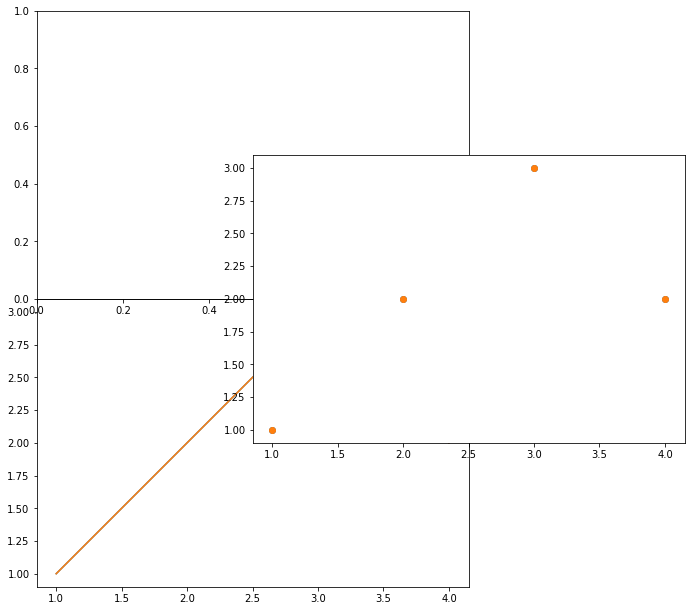

In [155]:
p1

In [156]:
p1.axes[2].plot(x,y2,':o')

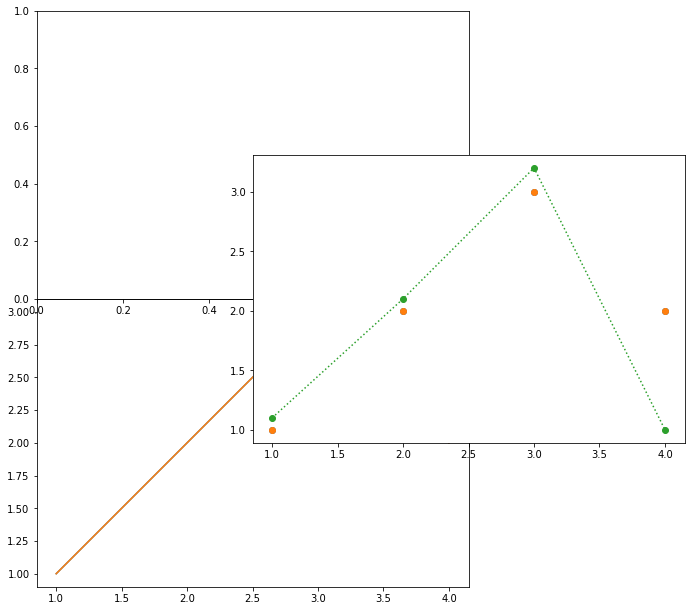

In [157]:
p1